starting camera...
capturing image...
reading image


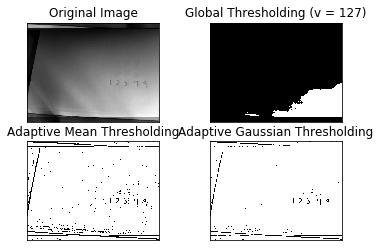

In [1]:
#
# camera画像を適応的閾値処理で2値化する
# 
import numpy as np
import cv2
from matplotlib import pyplot as plt

# define a video capture object
vid = cv2.VideoCapture(0)

# Capture a video frame
ret, frame = vid.read()
# Display the resulting frame
print("starting camera...")
cv2.imshow('frame', frame)
if not ret:
	print("failed to grab frame")
	exit()
else:
	print("capturing image...")
	cv2.imwrite("puzzle.png",frame)

vid.release()

# Read image
print("reading image")
img = cv2.imread('puzzle.png',cv2.IMREAD_GRAYSCALE)
# 中央値フィルタ
img = cv2.medianBlur(img,5)

# 単純閾値
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# 適応的閾値
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.savefig("bin_adaptive_all.png")
plt.show()

## VScode+jupyter noteを試してみた
python codeと出力がセットで表示できる。補足説明等も埋め込めるので便利。
GitHub上でもノートが表示される